# Feature Scaling

Feature scaling is crucial for gradient descent as it ensures that features are on a similar range, preventing slow convergence and uneven weight updates. Without scaling, features with larger values can dominate those with smaller values, leading to large gradients that necessitate very small learning rates.

## Feature Scaling Techniques

### 1. Standardization

   - Scales features to have a mean of 0 and a standard deviation of 1.
   - Formula: 
      $$x_i = \frac{x_i - \mu_i}{\sigma_i}$$
   
     Where,
     - $\mu_i$: Mean of the $i$-th feature.
     - $\sigma_i$: Standard deviation of the $i$-th feature.
   - Useful when data is normally distributed and for algorithms like linear regression, logistic regression, and PCA.
   - Less affected by outliers compared to min-max scaling.

### 2. Min-Max Scaling

   - Scales features to be within the range of 0 to 1.
   - Formula: 
      $$x_i = \frac{x_i - \min(x_i)}{\max(x_i) - \min(x_i)}$$
   
      Where,
     - $i\min(x_i)$: Minimum value of the $i$-th feature.
     - $i\max(x_i)$: Maximum value of the $i$-th feature.
   - Useful when there are no assumptions about data distribution.
   - Suitable for algorithms like decision trees, random forests, and Naive Bayes.
   - Highly affected by outliers due to reliance on minimum and maximum values.
   
</br>

>**Feature scaling** is essential for efficient gradient descent and balanced weight updates.
>- Standardization is generally preferred for normally distributed data and robustness to outliers.
>
>- Min-max scaling is used for non-distribution specific scenarios but is sensitive to outliers.

## Exercise: Linear Regression with Feature Scaling & Gradient Descent 

Implementing Linear Regression with Gradient Descent on a [advertising dataset](https://www.statlearning.com/s/Advertising.csv) where _TV_, _radio_ and _newspaper_ are adevertising mediums (input variables) and _sales_ is output variable. 

In [48]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [49]:
# Read the CSV data from the link
data_path = "https://www.statlearning.com/s/Advertising.csv" 
df = pd.read_csv(data_path, index_col=0)

df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [50]:
def features(df, feature):  
    # Feature matrix
    X = df[feature].values

    # Adding the column of ones in X
    X = np.c_[np.ones((X.shape[0], 1)), X]
    # print(X)

    # Outputs
    y = df['sales'].values.reshape(-1, 1)

    n = X.shape[0] # number of rows
    d = X.shape[1] # number of columns
    return X, y, n, d

feature = ['TV', 'radio', 'newspaper']
X, y, n, d = features(df, feature)

print("no. of samples (n): ", n)
print("no. of features (d): ", d)

no. of samples (n):  200
no. of features (d):  4


In [51]:
# Checking statistics of advertising data
df.iloc[:, :3].describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [52]:
# Using standardization technique for feature scale
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()  # x_i = (x_i - mean(x_i)) / std(x_i)
X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()  
X[:,3] = (X[:,3] - X[:,3].mean()) / X[:,3].std()

print("Mean of TV: {:.2f}". format(X[:,1].mean()))
print("Mean of radio: {:.2f}". format(X[:,2].mean()))
print("Mean of newspaper: {:.2f}". format(X[:,3].mean()))

print("Std of TV: {:.2f}". format(X[:,1].std()))
print("Std of radio: {:.2f}". format(X[:,2].std()))
print("Std of newspaper: {:.2f}". format(X[:,3].std()))

Mean of TV: 0.00
Mean of radio: -0.00
Mean of newspaper: 0.00
Std of TV: 1.00
Std of radio: 1.00
Std of newspaper: 1.00


In [53]:
# Applying standardization in dataframe
pd.DataFrame(X, columns=['_', 'TV', 'radio', 'newspaper'])

,_,TV,radio,newspaper
0,1.0,0.969852,0.981522,1.778945
1,1.0,-1.197376,1.082808,0.669579
2,1.0,-1.516155,1.528463,1.783549
3,1.0,0.052050,1.217855,1.286405
4,1.0,0.394182,-0.841614,1.281802
...,...,...,...,...
195,1.0,-1.270941,-1.321031,-0.771217
196,1.0,-0.617035,-1.240003,-1.033598
197,1.0,0.349810,-0.942899,-1.111852
198,1.0,1.594565,1.265121,1.640850


In [54]:
# Applying gradient descent algorithm
def beta_init():
    np.random.seed(0)
    return np.random.randn(d, 1)

def calculate_cost(betas):
    return 1/2 * np.sum(np.square(np.dot(X, betas)-y))

def calculate_gradients(betas):
    gradients = np.dot(X.T,(np.dot(X,betas)-y))
    return gradients

In [55]:
# Calculate gradient descent
def gradient_descent(alpha=3e-3, max_iter=10000, precision=1e-3):
    iteration, diff = 0, 1
    betas = beta_init() 
    cost = calculate_cost(betas)    # Initial cost parameter
    costs = [calculate_cost(betas)] # list containing the history of costs for different iterations

    while diff > precision and iteration <= max_iter:
        # Update value of parameters
        betas = betas - alpha * calculate_gradients(betas)

        # Cost for the new parameter
        cost = calculate_cost(betas)

        # Difference between updated and old cost
        diff = np.abs(costs[iteration] - cost) 
        costs.append(cost)
        
        print("iteration: {}, cost: {}".format(iteration, cost))
        iteration += 1
        
        if(cost == np.infty):
            print("Cost reached infinity, try smaller learning rate")
            break
        
    return betas, iteration, costs

In [56]:
beta, steps, costs = gradient_descent()

iteration: 0, cost: 3088.921208468105
iteration: 1, cost: 773.3549524960547
iteration: 2, cost: 374.27426818129265
iteration: 3, cost: 299.94774436625687
iteration: 4, cost: 284.1733262517472
iteration: 5, cost: 280.20114133374136
iteration: 6, cost: 279.02366882299606
iteration: 7, cost: 278.63221698846155
iteration: 8, cost: 278.49345361475844
iteration: 9, cost: 278.44270007295756
iteration: 10, cost: 278.42387056330193
iteration: 11, cost: 278.41684095251674
iteration: 12, cost: 278.4142094554077
iteration: 13, cost: 278.41322321503844


Previously, we had inifinity when we chose to calculate gradients on a non-feature scaled data and $3e-3$ $learning rate. Now, the gradients are calculated quickly without restriction of a very small learning rate. This makes time required to converge extremely faster. 

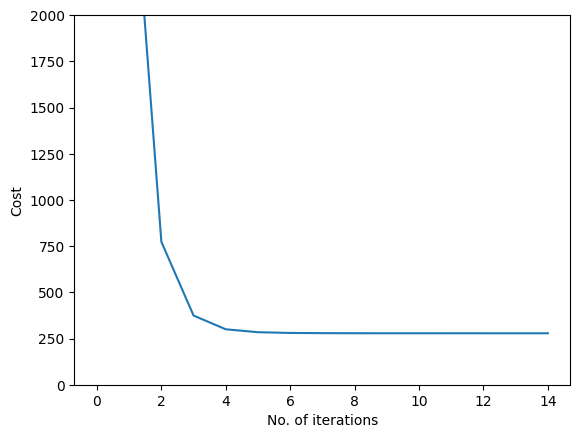

In [57]:
plt.plot(costs)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.ylim(0, 2000)
plt.show()

In [58]:
X[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min()) # x_i = (x_i - min(x_i)) / (max(x_i) - min(x_i))
X[:,2] = (X[:,2] - X[:,2].min()) / (X[:,2].max() - X[:,2].min())  
X[:,3] = (X[:,3] - X[:,3].min()) / (X[:,3].max() - X[:,3].min()) 

print("Min of TV: {:.2f}". format(X[:,1].min()))
print("Min of radio: {:.2f}". format(X[:,2].min()))
print("Min of newspaper: {:.2f}". format(X[:,3].min()))

print("Max val of TV: {:.2f}". format(X[:,1].max()))
print("Max val of radio: {:.2f}". format(X[:,2].max()))
print("Max val of newspaper: {:.2f}". format(X[:,3].max()))

Min of TV: 0.00
Min of radio: 0.00
Min of newspaper: 0.00
Max val of TV: 1.00
Max val of radio: 1.00
Max val of newspaper: 1.00


In [59]:
# Applying min-max scaling in dataframe
pd.DataFrame(X, columns=['_', 'TV', 'radio', 'newspaper'])

,_,TV,radio,newspaper
0,1.0,0.775786,0.762097,0.605981
1,1.0,0.148123,0.792339,0.394019
2,1.0,0.055800,0.925403,0.606860
3,1.0,0.509976,0.832661,0.511873
4,1.0,0.609063,0.217742,0.510994
...,...,...,...,...
195,1.0,0.126818,0.074597,0.118734
196,1.0,0.316199,0.098790,0.068602
197,1.0,0.596212,0.187500,0.053650
198,1.0,0.956713,0.846774,0.579595


In [60]:
# Applying gradient descent algorithm
beta, steps, costs = gradient_descent()

iteration: 0, cost: 1201.9241991770855
iteration: 1, cost: 1095.8004284855278
iteration: 2, cost: 1038.2932499949652
iteration: 3, cost: 985.0741730542815
iteration: 4, cost: 935.6908785075418
iteration: 5, cost: 889.8608448634137
iteration: 6, cost: 847.3231441694329
iteration: 7, cost: 807.8363443460353
iteration: 8, cost: 771.1770254771925
iteration: 9, cost: 737.1384126146361
iteration: 10, cost: 705.5291143608197
iteration: 11, cost: 676.171958862939
iteration: 12, cost: 648.9029195330577
iteration: 13, cost: 623.5701234303639
iteration: 14, cost: 600.0329358110646
iteration: 15, cost: 578.1611148737944
iteration: 16, cost: 557.8340312076793
iteration: 17, cost: 538.9399468900156
iteration: 18, cost: 521.3753495842159
iteration: 19, cost: 505.04433735931485
iteration: 20, cost: 489.85805029265236
iteration: 21, cost: 475.7341452299514
iteration: 22, cost: 462.59631036417414
iteration: 23, cost: 450.3738165584008
iteration: 24, cost: 439.00110258047937
iteration: 25, cost: 428.4173

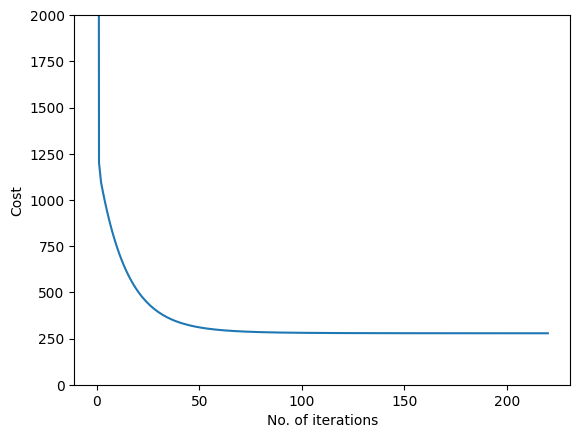

In [61]:
plt.plot(costs)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.ylim(0, 2000)
plt.show()

## Comparision Between Min-Max Scaling and Standardization

| Aspect                     | Min-Max Scaling Normalization                         | Z-Score Standardization                     |
|----------------------------|-----------------------------------------------|---------------------------------------------|
| **Range**                  | Scales features to [0, 1]                     | Transforms features to mean 0, std dev 1    |
| **Variance**               | Does not standardize variance                 | Standardizes variance                       |
| **Condition Number**       | May not effectively reduce condition number   | Often leads to lower condition number       |
| **Gradient Descent Path**  | Can create elongated cost function contours   | Typically results in spherical contours     |
| **Learning Rate Sensitivity** | More sensitive to learning rate            | Less sensitive to learning rate             |
| **Convergence Speed**      | Slower due to potential variance differences  | Faster due to standardized variance         |
| **Feature Distribution**   | Features may still have different variances   | Features have comparable variance           |
| **Feature Correlation**    | Less impact on decorrelating features         | Helps in decorrelating features             |